In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.ndimage import median_filter
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sympy import symbols, log, sqrt, Piecewise
from sympy.functions import Abs
from sympy.plotting import plot

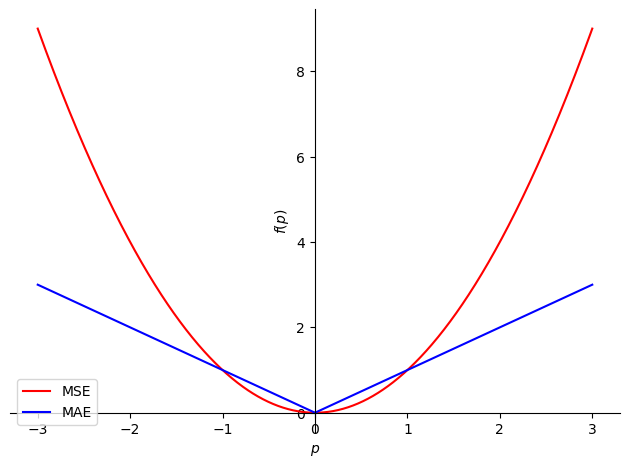

In [2]:
a = symbols('a') #actual value
p = symbols('p') #predicted value

mse = lambda a,p: (a-p)**2

mse_plot = plot(mse(0, p),(p, -3, 3), show=False, legend=True, line_color="red")
mse_plot[0].label='MSE'

mae = lambda a,p: Abs(a-p)
mae_plot = plot(mae(0, p),(p, -3, 3), show=False, line_color="blue")
mae_plot[0].label = "MAE"
mse_plot.extend(mae_plot)
mse_plot.show()


Huber loss использует параметр $\delta$ для определения промежуточной позиции между MSE и MAE: $$L(a, p) = \left\{\begin{aligned} \tfrac{1}{2}(a-p)^2 \quad\mathrm{for}\ |a-p| \le \delta \\ \delta\vert a - p \vert - \tfrac{1}{2}\delta^2 \quad\mathrm{otherwise} \end{aligned}\right. $$

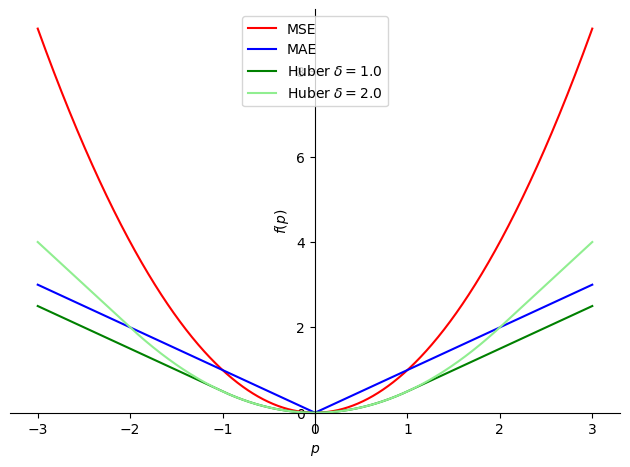

In [3]:
a = symbols('a') #actual value
p = symbols('p') #predicted value

mse = lambda a,p: (a-p)**2
mae = lambda a,p: Abs(a-p)
huber = lambda delta,a,p: Piecewise((0.5*(a-p)**2, Abs(a-p) <= delta), 
                                    (delta*Abs(a-p)-0.5*delta**2, True))

mse_plt = plot(mse(0, p),(p, -3, 3), show=False, legend=True, line_color="red")
mse_plt[0].label='MSE'

mae_plt = plot(mae(0, p),(p, -3, 3), show=False, line_color="blue")
mae_plt[0].label = "MAE"
mse_plt.extend(mae_plot)

huber1_plt = plot(huber(1, 0, p),(p, -3, 3), show=False, line_color="green")
huber1_plt[0].label = r"Huber $\delta=1.0$"
huber2_plt = plot(huber(2.0, 0, p),(p, -3, 3), show=False, line_color="lightgreen")
huber2_plt[0].label = r'Huber $\delta=2.0$'
mse_plt.extend(huber1_plt)
mse_plt.extend(huber2_plt)
mse_plt.show()